<h1 align="center"> Emotion Analysis in RSS News <h1>

In [8]:
%matplotlib notebook
%config InlineBackend.close_figures = False
import main
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output
from IPython.display import Javascript
import matplotlib.pyplot as plt
from IPython.core.display import HTML

fig_size = []
fig_size.append(9)
fig_size.append(5)
plt.rcParams["figure.figsize"] = fig_size

def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



<h2 align="center"> Selection of the terms of the search <h2>

In [9]:
text = widgets.Text(placeholder="Insert the CED words separated by commas")
text.layout.width='100%'
display(text)
def handle_submit(sender):
    clear_output()
    newced = main.parseinput(text.value)
    main.setcedwords(newced)
    print ("the new CED is: "+ str(newced))
    display(Javascript('IPython.notebook.execute_cells_below()'))

text.on_submit(handle_submit)

<IPython.core.display.Javascript object>

<h2 align="center"> Emotion Graph <h2>

<IPython.core.display.Javascript object>


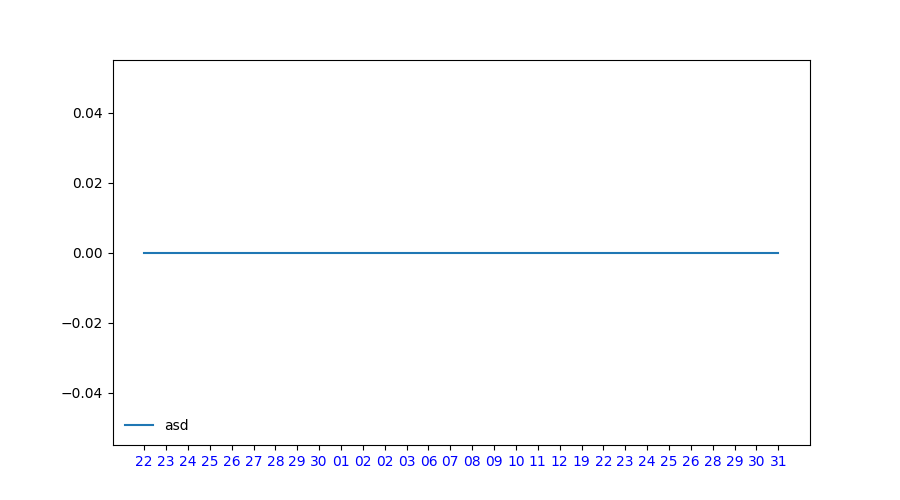

In [10]:
d = 0.5
e = 0.5
emfig = plt.figure("Emotions")


def f(Delta):
    global d
    d = Delta
    

def g(Epsilon):
    global e
    e = Epsilon
    
def on_button_clicked(b):
    global d
    global e
    main.EmotionAnalysis(d,e,emfig)
    





In [11]:
a = interact(f,Delta = FloatSlider(min=0,max=1,step=0.001,width='100%',value=0.5))
b = interact(g,Epsilon = FloatSlider(min=0,max=1,step=0.001,width='100%',value=0.5))
button = widgets.Button(description = "DRAW!")
display(button)
button.on_click(on_button_clicked)

<h2 align="center"> Relationship Graph <h2>

<IPython.core.display.Javascript object>


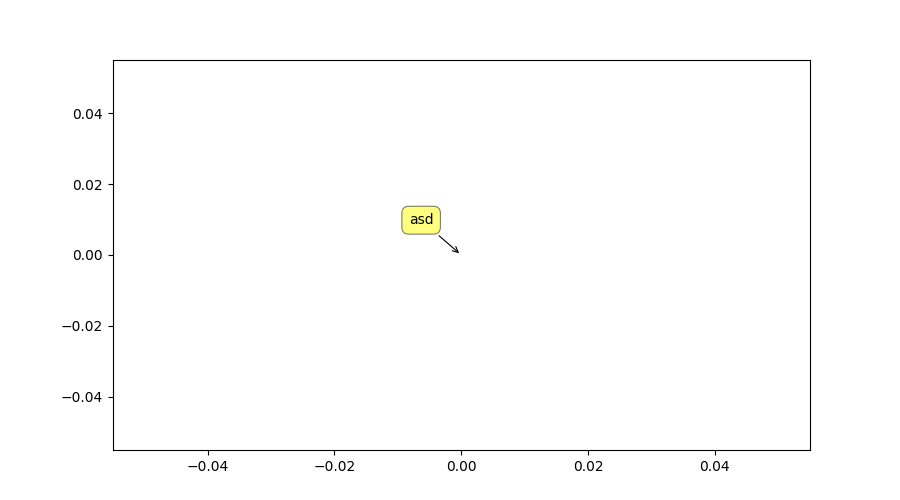

In [12]:
def dayrel(day):
    global relfig
    main.RelationDay(day,relfig)
    print(main.dayslist[day])
relfig = plt.figure("Relations")

In [13]:

interact(dayrel,day=IntSlider(min=0,max=len(main.relationsmatrixes)-1,step=1,value=0,width='100%'))

2016 - 01 - 05


/home/gonzalo/BD/venv/lib/python3.4/site-packages/sklearn/manifold/mds.py:127: RuntimeWarning: invalid value encountered in double_scalars
  old_stress = stress / dis
/home/gonzalo/BD/venv/lib/python3.4/site-packages/sklearn/manifold/mds.py:122: RuntimeWarning: invalid value encountered in double_scalars
  if(old_stress - stress / dis) < eps:


<function __main__.dayrel>